In [1]:
import pandas as pd

In [294]:
train = pd.read_csv('train.csv')
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [252]:
import sklearn
import numpy as np
import re
import string
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def preprocess(corpus):
    # Create a set of stopwords
    stopwords_english = set(stopwords.words('english'))

    cleaned_corpus = []
    for text in corpus:
        # Lowercase
        text = text.lower()
        # Remove links
        text = re.sub(r'https?://[^\s\n\r]+', '', text)
        # Remove punctuation
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        # Remove words containing numbers
        text = re.sub(r'\w*\d\w*', '', text)
        # Tokenize and remove stopwords
        words = text.split()
        words = [word for word in words if word not in stopwords_english]
        cleaned_corpus.append(' '.join(words))
    return cleaned_corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amreshsenathirajah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [295]:
# Use your preprocess function to clean the text
clean_train_comments = preprocess(train['comment_text'])


print(clean_train_comments[0])

explanation edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired


In [296]:
#Create a new subset of the data by only taking the 2nd column onwards
data_count=train.iloc[:,2:].sum()
print(data_count)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [297]:
 toxic = train.loc[:,['id','comment_text','toxic']]
# print(toxic['comment_text'][0])

In [298]:
i_hate = train.loc[:,['id','comment_text','identity_hate']]
# print(i_hate)

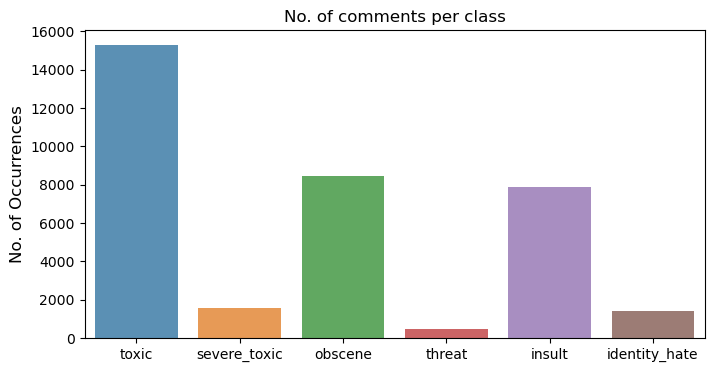

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
ax = sns.barplot(x=data_count.index, y=data_count.values, alpha=0.8)
plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xticks(rotation=0) #its for the labels 
plt.show()


159571


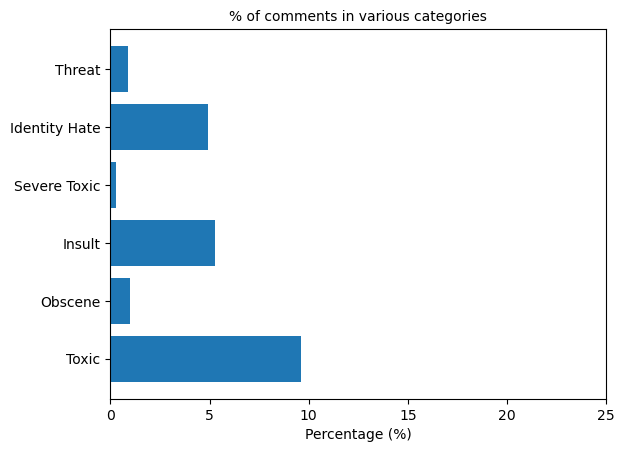

In [300]:
# Create a bar graph 

num_rows = len(train)
print(num_rows)
total_toxicity = train['toxic'].sum() / num_rows * 100
total_severe_toxicity = train['severe_toxic'].sum() / num_rows * 100
total_obscene = train['obscene'].sum() / num_rows * 100
total_threat = train['threat'].sum() / num_rows * 100
total_insult = train['insult'].sum() / num_rows * 100
total_identity_hate = train['identity_hate'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
index = np.arange(6)

# Let the index variable be the x-axis, whereas the % of toxicity for each category be the y-axis.

bar_g = plt.barh(index, [total_toxicity, total_severe_toxicity, total_obscene, total_threat, total_insult, total_identity_hate])
plt.xlabel('Percentage (%)', size=10)
plt.xticks(np.arange(0, 30, 5), size=10)
plt.title('% of comments in various categories', size=10)
plt.yticks(index, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=10)


plt.gca()
plt.show()

<Axes: title={'center': 'Correlation of features & labels'}>

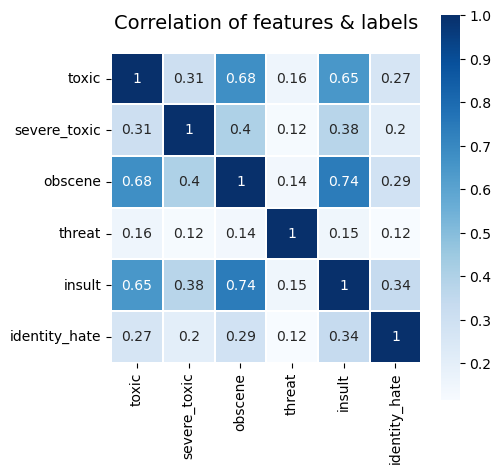

In [301]:
#correlation heatmap
data = train.iloc[:,2:]

colormap = plt.cm.plasma
plt.figure(figsize=(5,5))
plt.title('Correlation of features & labels',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap='Blues',
           linecolor='white',annot=True)

In [302]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


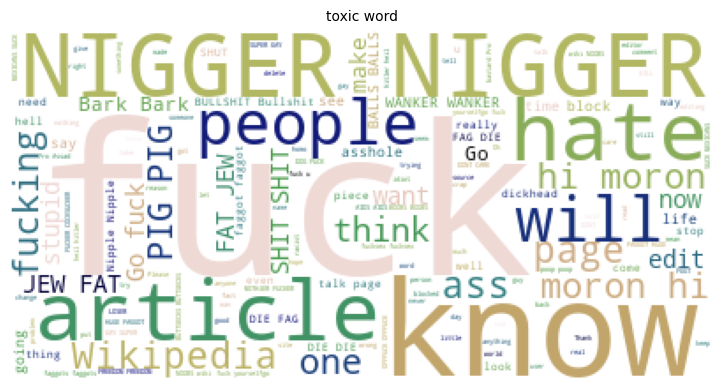

In [261]:
#Creating a word cloud for easier representation for toxic label
def wordcloud(df, label, title):
    subset = df[df[label] == 1]
    text = subset.comment_text.values
    wc = WordCloud(background_color="white", max_words=2000)
    wc.generate(" ".join(text))

    plt.figure(figsize=(20, 20))
    plt.subplot(221)
    plt.axis("off")
    plt.title(title, fontsize=10) 
    plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

wordcloud(toxic, 'toxic', "toxic word")

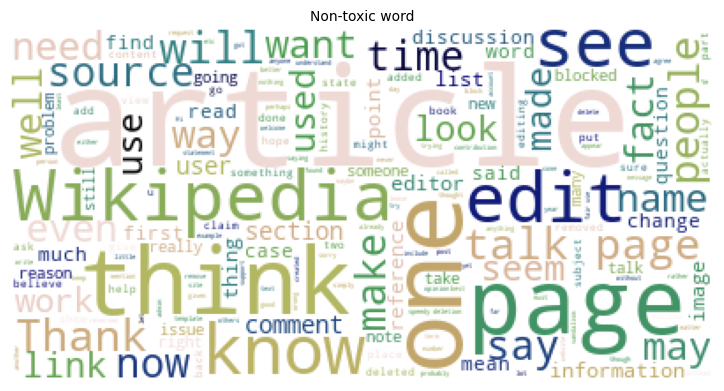

In [262]:
def wordcloud(df, label, title):
    subset = df[df[label] == 0]
    text = subset.comment_text.values
    wc = WordCloud(background_color="white", max_words=2000)
    wc.generate(" ".join(text))

    plt.figure(figsize=(20, 20))
    plt.subplot(221)
    plt.axis("off")
    plt.title(title, fontsize=10)  # Change the title here
    plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

wordcloud(toxic, 'toxic', "Non-toxic word")


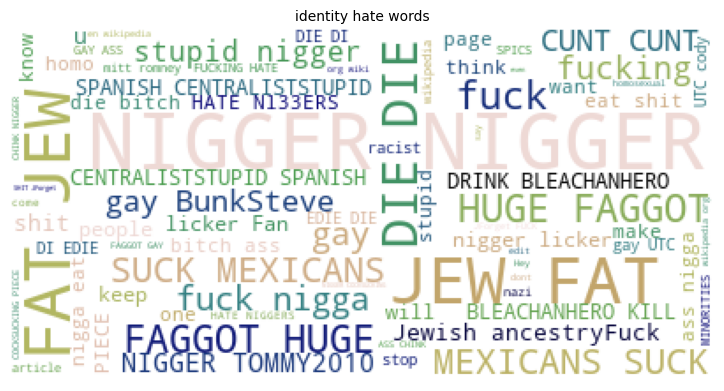

In [246]:
def wordcloud(df, label, title):
    subset = df[df[label] == 1]
    text = subset.comment_text.values
    wc = WordCloud(background_color="white", max_words=2000)
    wc.generate(" ".join(text))

    plt.figure(figsize=(20, 20))
    plt.subplot(221)
    plt.axis("off")
    plt.title(title, fontsize=10)  # Change the title here
    plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

wordcloud(i_hate, 'identity_hate', "identity hate words")

In [303]:
from sklearn.feature_extraction.text import TfidfVectorizer

y = train.loc[:,'toxic':'identity_hate']
 
# Feature extraction using TF-IDF
vect = TfidfVectorizer(max_features=2000,stop_words = 'english', ngram_range=(1,2))
x = vect.fit_transform(clean_train_comments)



 

In [264]:
#Train-test-split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


In [304]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
# Train a multi-label classifier
nb_clf = MultiOutputClassifier(MultinomialNB())
nb_clf.fit(x_train, y_train)
 

y_pred1 = nb_clf.predict(x_train)
# print(y_pred1)

In [305]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy_1 = accuracy_score(y_train, y_pred1)
print("Accuracy Naive Bayes:", accuracy_1)

p_micro, r_micro, f1_micro, _ = prfs(y_pred=y_pred1, y_true=y_train, average="micro", zero_division = 1)
nb_mic = "Micro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_micro, r_micro, f1_micro)
print(nb_mic)
p_macro, r_macro, f1_macro, _ = prfs(y_pred=y_pred1, y_true=y_train, average="macro", zero_division = 1)
nb_mac = "Macro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_macro, r_macro, f1_macro)
print(nb_mac)

Accuracy Naive Bayes: 0.9145202732343173
Micro Evaluation: Precision: 0.8666; Recall: 0.4756; F1-Score: 0.6142
Macro Evaluation: Precision: 0.6497; Recall: 0.3347; F1-Score: 0.4306


In [306]:
from sklearn.model_selection import cross_val_score
import random
import numpy as np
np.random.seed(42)
random.seed(32)

scores = cross_val_score(nb_clf, x, y, cv=5, scoring="f1_micro")
print(scores)
print(scores.mean())

[0.60244928 0.60231589 0.59929078 0.61137485 0.60708014]
0.6045021861345965


In [307]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier


# Define your parameter grid for the alpha hyperparameter
param_grid = {
    'estimator__alpha': [0.1,0.5,1.0,2.0],
    'estimator__fit_prior': [True,False]
}

# Create the grid search object
grid_search = GridSearchCV(nb_clf, param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the training data (replace x_train and y_train with your actual data)
grid_search.fit(x_train, y_train)

# Accessing the best hyperparameters and the optimized classifier
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best hyperparameters:", best_params)
print("Best estimator:", best_estimator)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best hyperparameters: {'estimator__alpha': 1.0, 'estimator__fit_prior': True}
Best estimator: MultiOutputClassifier(estimator=MultinomialNB())


In [308]:
# Use the best estimator to make predictions
y_pred = best_estimator.predict(x_val)

print(y_pred)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [270]:
test = pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [271]:
import sklearn
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def preprocess(corpus):
    # Create a set of stopwords
    stopwords_english = set(stopwords.words('english'))

    cleaned_corpus = []
    for text in corpus:
        # Lowercase
        text = text.lower()
        # Remove links
        text = re.sub(r'https?://[^\s\n\r]+', '', text)
        # Remove punctuation
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        # Remove words containing numbers
        text = re.sub(r'\w*\d\w*', '', text)
        # Tokenize and remove stopwords
        words = text.split()
        words = [word for word in words if word not in stopwords_english]
        cleaned_corpus.append(' '.join(words))
    return cleaned_corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amreshsenathirajah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [309]:
# Use your preprocess function to clean the text

clean_test_comments = preprocess(test['comment_text'])

print(clean_test_comments[0])

yo bitch ja rule succesful youll ever whats hating sad mofuckasi bitch slap ur pethedic white faces get kiss ass guys sicken ja rule pride da music man dont diss shit nothin wrong bein like tupac brother toofuckin white boys get things right next time


In [310]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect1= TfidfVectorizer(max_features=2000, stop_words='english', ngram_range=(1,2))
vect1.fit(clean_train_comments)
z = vect.transform(clean_test_comments)

In [311]:
pred_test= nb_clf.predict_proba(z)
#print(pred_test)

In [312]:
subm = pd.read_csv('sample_submission.csv')
subm.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


[CV] END ....estimator__alpha=0.1, estimator__fit_prior=True; total time=   0.2s
[CV] END ....estimator__alpha=1.0, estimator__fit_prior=True; total time=   0.1s
[CV] END ....estimator__alpha=0.5, estimator__fit_prior=True; total time=   0.2s
[CV] END ...estimator__alpha=1.0, estimator__fit_prior=False; total time=   0.1s
[CV] END ....estimator__alpha=0.1, estimator__fit_prior=True; total time=   0.2s
[CV] END ...estimator__alpha=1.0, estimator__fit_prior=False; total time=   0.1s
[CV] END ...estimator__alpha=0.1, estimator__fit_prior=False; total time=   0.2s
[CV] END ...estimator__alpha=1.0, estimator__fit_prior=False; total time=   0.1s
[CV] END ....estimator__alpha=0.5, estimator__fit_prior=True; total time=   0.2s
[CV] END ....estimator__alpha=2.0, estimator__fit_prior=True; total time=   0.1s
[CV] END ....estimator__alpha=0.5, estimator__fit_prior=True; total time=   0.2s
[CV] END ....estimator__alpha=2.0, estimator__fit_prior=True; total time=   0.1s
[CV] END ...estimator__alpha

In [289]:
for i in range(len(subm)):
    for j in range(1, 7):  # Assuming there are 6 classes
        subm.loc[i, f"Class_{j}"] = pred_test[j-1][i][1]  # Assuming the second value in each subarray corresponds to the positive class



In [290]:
subm.to_csv("new_subm.csv", index=False)

In [291]:
# Remove unwanted columns
subm = subm.drop(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], axis=1)

# Defining the new column names
new_column_names = {
    'Class_1': 'toxic',
    'Class_2': 'severe_toxic',
    'Class_3': 'obscene',
    'Class_4': 'threat',
    'Class_5': 'insult',
    'Class_6': 'identity_hate'
}

# Rename the columns
subm1 = subm.rename(columns=new_column_names)

# Save the updated DataFrame to a new CSV file
subm.to_csv("new_subm.csv", index=False)


In [292]:
subm1.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.980801,0.205584,0.950090,0.024741,0.899235,0.244161
1,0000247867823ef7,0.016474,0.002044,0.008480,0.001623,0.008448,0.002902
2,00013b17ad220c46,0.029626,0.001022,0.012230,0.000394,0.011469,0.001714
3,00017563c3f7919a,0.008594,0.000888,0.003833,0.000415,0.003664,0.000647
4,00017695ad8997eb,0.069977,0.001725,0.028842,0.000467,0.026106,0.001621


In [293]:
print(clean_test_comments[0])
print(clean_test_comments[3])
#notice the difference in toxicity of the sentences.

yo bitch ja rule succesful youll ever whats hating sad mofuckasi bitch slap ur pethedic white faces get kiss ass guys sicken ja rule pride da music man dont diss shit nothin wrong bein like tupac brother toofuckin white boys get things right next time
look back source information updated correct form guess source hadnt updated shall update information thank message
